# Summary of Mortality Rates for various Medical Procedures in Californian Hospitals

Spring 2025 Data Science Project

Franciszek Pajak, Aashrit Sabbani, Achyutha Duddebanda

Contributions:
Every group member tackled a bespoke problem of their choice. Their unique problems are listed below. 

## Introduction
Each year in the United States, over 50 million surgical procedures are conducted to treat a variety of diseases, ranging from stroke to heart disease. Many of these diseases are fatal if left alone — note that heart disease causes approximately 1 out of 5 deaths in the United States each year. Therefore, focusing on improving the success of these surgical procedures is critical for improving social welfare and overall Quality of Life.

A significant factor that characterizes the success of a particular surgery is its **mortality rate**, or how many deaths it causes each year on average. In general, hospitals have an incentive to minimize mortality rates as much as possible, not only to reduce patient death rates but to increase their own **quality rating** (a qualitative assessment of the services the hospital provides, including surgery) and attract more patients into their network. Hence, understanding trends (over time) in mortality rates and quality ratings for specific surgical procedures in hospitals is crucial for the medical industry (to learn where to focus efforts in reducing death rates) and for hospitals (to know which procedures might require targeted improvement, which will increase their quality rating).

In this tutorial, we attempt to address these themes. We specifically analyze hospitals in the state of California -- being the most populous and one of the largest geographically, states in the U.S. which conducts the most surgical procedures, California serves as a representative sample which might hint to overall surgical and hospital trends in the United States as a whole.

We would like to answer, to the best extent, the following questions:
1. Does geographical location affect the quality rating for a hospital or mortality rate for a specific procedure?
2. Do certain do different hospitals in different years receive higher or lower quality ratings depending on the mortality rate that year as well as other factors such as the population they serve.
3. Have performance rates decreased over time? What are the general trends for the procedure success rate across all hospitals, or a specific hospital?


Answering the questions above is important because by looking at the patterns in healthcare outcomes, we can imporove healthcare policy. In order to ensure equitable health outcomes across regions, policymakers should make data driven decisions when distributing resources. Additionally, if certain regions have sucessful medical practices that benefit patient outcomes those practices can be investigated to benefit the population. Narrowly examining procedural effectiveness on a granular level can inform patients on areas with the best outcomes and guide them when seeking care.

Along the way, we will explain the steps we took in the data science life cycle, and the steps necessary to performing successful data analysis.

## Format
We will investigate each of our questions and machine learning problems in order following the outline below (each problem will have its own preprocessing stage for example)


A: Project idea

B: Dataset Curation and Preprocessing

C: Data Exploration and Summary Statistics

D: ML Algorithm Design/Development

E: ML Algorithm Training and Test Data Analysis

F: Visualization, Result Analysis, Conclusion

G: Final Tutorial Report Creation

H: Additional (not listed above)

# Data Exploration and Summary
## About the dataset

The primary dataset that we are exploring consists of inpatient mortality data in the state of California after treatment
of various diseases, including stroke and heart failure. We are trying to investigate various
procedures such as pancreatic resection and understand how common they are as well as their
mortality rates, in order to assess surgeon performance over time. Analyzing trends in the
mortality rates will allow us to understand the future implications technology will have in the
medical field, by allowing us to determine the efficacy of current medical techniques in curing
such diseases/illnesses.

In [22]:
import pandas as pd

df = pd.read_csv("CMSC320_FinalProj_Database.csv")            
rating_map = {'As Expected': 1, 'Worse': 0, 'Better': 2}      #map to be used to change hospital ratings from string to number for classification

df.head(22)

,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
0,2016,AAAA,STATEWIDE,NaN,AAA Repair Unruptured,1.3,30,2358,NaN,NaN,NaN
1,2016,AAAA,STATEWIDE,NaN,AMI,6.1,3178,52167,NaN,NaN,NaN
2,2016,AAAA,STATEWIDE,NaN,Acute Stroke,9.1,5482,60184,NaN,NaN,NaN
3,2016,AAAA,STATEWIDE,NaN,Acute Stroke Hemorrhagic,21.1,2580,12210,NaN,NaN,NaN
4,2016,AAAA,STATEWIDE,NaN,Acute Stroke Ischemic,5,2258,45141,NaN,NaN,NaN
5,2016,AAAA,STATEWIDE,NaN,Acute Stroke Subarachnoid,22.7,644,2833,NaN,NaN,NaN
6,2016,AAAA,STATEWIDE,NaN,Carotid Endarterectomy,0.5,25,4894,NaN,NaN,NaN
7,2016,AAAA,STATEWIDE,NaN,Espophageal Resection,3.9,11,281,NaN,NaN,NaN
8,2016,AAAA,STATEWIDE,NaN,GI Hemorrhage,2.6,1412,54011,NaN,NaN,NaN
9,2016,AAAA,STATEWIDE,NaN,Heart Failure,2.9,2763,95205,NaN,NaN,NaN


In the data above I will take care to filter out the outliers in order to perform a good exploratory data analysis. I will study how different procedures have higher risk mortality. Also I can see that the data above has approximately fifty thousand rows. The different features of the dataset such as the columns which are important are the risk adjusted mortality and the procedure/conditions. The other columns in the future could be used to perform a linear regression. Some procedures/conditions are a lot more rare than others. For example conditions such as stroke are quite common and are over represented in the database.

As can be seen above, Our dataset has 57652 rows. 

In [38]:
df['# of Cases'] = pd.to_numeric(df['# of Cases'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['Risk Adjuested Mortality Rate'] = pd.to_numeric(df['Risk Adjuested Mortality Rate'], errors='coerce')

df['# of Cases'] = df['# of Cases'].replace('.', 128.3).fillna(128.3).astype(int)    #The number 128.3 was previously calculated 

# Eliminate all outliers

print("Mean # of Cases per procedure per hospital:", df['# of Cases'].mean())

Mean # of Cases per procedure per hospital: 157.3785393694243


            Procedure_Condition  Risk_Adjusted_Mortality_Rate
17                          AMI                          16.1
18                 Acute Stroke                          23.6
19     Acute Stroke Hemorrhagic                          48.9
20        Acute Stroke Ischemic                          15.2
24                GI Hemorrhage                           4.6
...                         ...                           ...
57648             GI Hemorrhage                           2.5
57649             Heart Failure                           3.6
57650              Hip Fracture                           4.0
57651                       PCI                           4.3
57653                 Pneumonia                          11.9

[36094 rows x 2 columns]
Mean mortality rate: 5.989405441347593


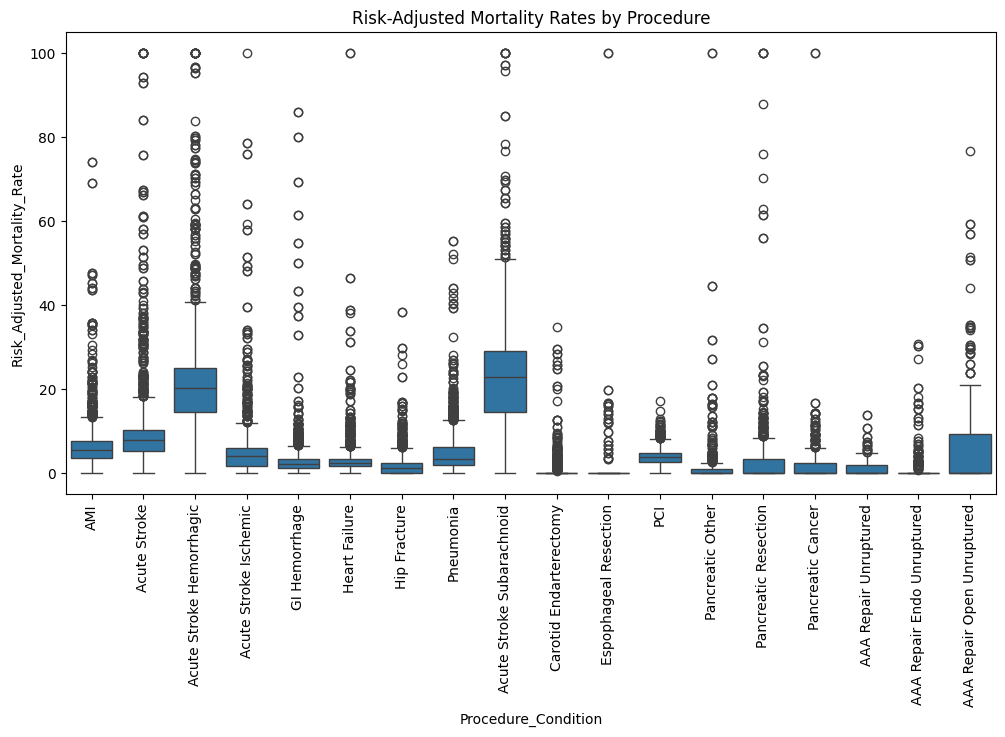

In [39]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
#df['Procedure/Condition'] = df['Procedure/Condition'].dropna()
#df['Risk Adjuested Mortality Rate'] = df['Risk Adjuested Mortality Rate'].dropna()

df_clean = df.dropna(subset=['Procedure/Condition', 'Risk Adjuested Mortality Rate']).copy()


custom_frame = pd.DataFrame({
    "Procedure_Condition": df_clean['Procedure/Condition'],
    "Risk_Adjusted_Mortality_Rate": df_clean['Risk Adjuested Mortality Rate']
})

print(custom_frame)
mortal = custom_frame['Risk_Adjusted_Mortality_Rate'].mean()
print("Mean mortality rate:", mortal)

grouped_by_procedure = custom_frame.groupby("Procedure_Condition")["Risk_Adjusted_Mortality_Rate"].agg(
    ['count', 'mean', 'std']
).reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(data=custom_frame, x="Procedure_Condition", y="Risk_Adjusted_Mortality_Rate")
plt.xticks(rotation=90) 
plt.title("Risk-Adjusted Mortality Rates by Procedure")
plt.show()

After looking at the graph above I chose not to investigate the question of what contributed to the mortality rate at a given hospital. Mortality rates aare highly dependent on the procedure and even then their vairances are quite high. 

## Conclusion 2

In [40]:
# Fill in the missing data points with the estimated mean (10)
df['# of Deaths'] = df['# of Deaths'].replace('.', 10).fillna(10).astype(int)

# Eliminate all outliers
df = df[(df["# of Deaths"] >= df["# of Deaths"].quantile(0.25) -
         1.5 * (df["# of Deaths"].quantile(0.75) - df["# of Deaths"].quantile(0.25))) &
        (df["# of Deaths"] <= df["# of Deaths"].quantile(0.75) +
         1.5 * (df["# of Deaths"].quantile(0.75) - df["# of Deaths"].quantile(0.25)))]

mean = df['# of Deaths'].mean()
print(f"OVERALL MEAN: {mean}") 
df

OVERALL MEAN: 4.840243496168872


,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
17,2016,Alameda,Alameda Hospital,106010735.0,AMI,16.1,3,17,As Expected,-122.253991,37.76266
18,2016,Alameda,Alameda Hospital,106010735.0,Acute Stroke,23.6,9,74,Worse,-122.253991,37.76266
19,2016,Alameda,Alameda Hospital,106010735.0,Acute Stroke Hemorrhagic,48.9,5,9,Worse,-122.253991,37.76266
20,2016,Alameda,Alameda Hospital,106010735.0,Acute Stroke Ischemic,15.2,4,65,As Expected,-122.253991,37.76266
24,2016,Alameda,Alameda Hospital,106010735.0,GI Hemorrhage,4.6,5,83,As Expected,-122.253991,37.76266
...,...,...,...,...,...,...,...,...,...,...,...
57647,2022,Yuba,Adventist Health and Rideout,106580996.0,Carotid Endarterectomy,0.0,0,23,As Expected,-121.593602,39.138805
57648,2022,Yuba,Adventist Health and Rideout,106580996.0,GI Hemorrhage,2.5,6,247,As Expected,-121.593602,39.138805
57649,2022,Yuba,Adventist Health and Rideout,106580996.0,Heart Failure,3.6,23,712,As Expected,-121.593602,39.138805
57650,2022,Yuba,Adventist Health and Rideout,106580996.0,Hip Fracture,4.0,6,167,As Expected,-121.593602,39.138805


In the above plots we see a large variance between the mortalities in each of the procedures. The two types of acute stroke clearly carry the highest mortality rates though. In the future correlation could be investigated because the strokes seem to be correlated. 

In [41]:
d = df['# of Deaths'].mean()
d2 = df[df['Procedure/Condition']=='Heart Failure']['# of Deaths'].mean()
print(f"Overall mean deaths: {d}") # overall deaths avg (around 14)
print(f"Mean deaths due to Heart Failure: {d2}") # Find the mean death rate of the "Heart Failure" procedure

Overall mean deaths: 4.840243496168872
Mean deaths due to Heart Failure: 7.435263311027058


We want to find whether the total number of inpatient deaths in California's hospitals caused by a "Heart Failure" procedure is the same as the overall mean death rate for all procedures with $\alpha = 0.05$.
$ \\ H_0: \mu = 7$
$ \\ H_a: \mu > 7$


In [42]:
from scipy import stats

# Gets the column of deaths due to Heart Failure
deaths = df[df['Procedure/Condition']=='Heart Failure']['# of Deaths']

# The overall mean here is approximately 7 (6.789)
pop_mean = 7

t_statistic, p_value = stats.ttest_1samp(a=deaths, popmean=pop_mean, alternative='greater')
print("P-value:", p_value)

P-value: 3.0114914393775856e-05


Since $p \approx 0.007 < 0.05$, we reject $H_0$ and claim that the total number of inpatient deaths in California's hospitals caused by a "Heart Failure" procedure is significantly greater than the overall average of deaths ($7$).

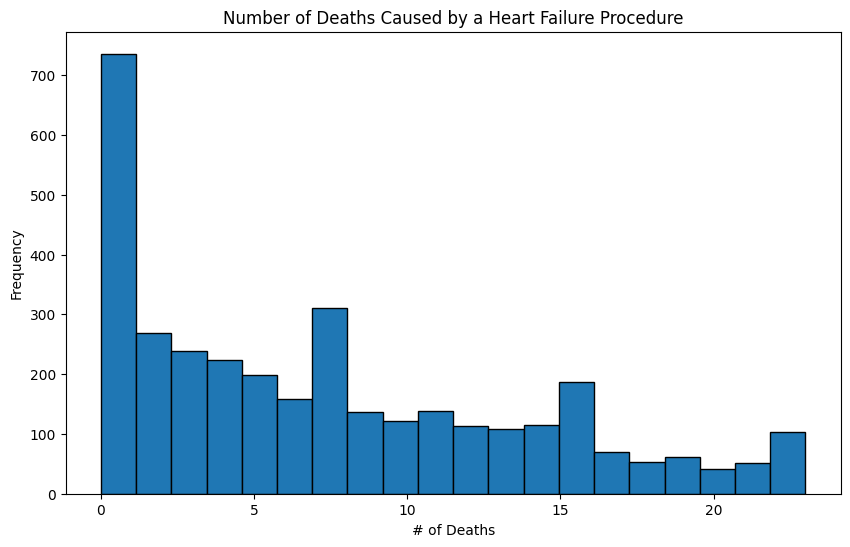

In [43]:
import matplotlib.pyplot as plt

# Data visualization
plt.figure(figsize=(10, 6))
plt.hist(df[df['Procedure/Condition']=='Heart Failure']['# of Deaths'], bins=20, edgecolor='black')
plt.title('Number of Deaths Caused by a Heart Failure Procedure')
plt.xlabel('# of Deaths')
plt.ylabel('Frequency')
plt.show()

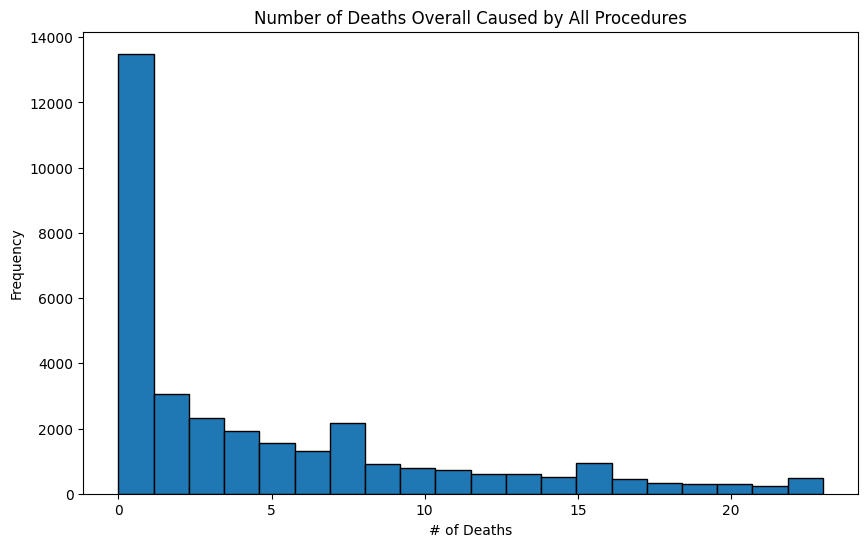

In [44]:
import matplotlib.pyplot as plt

# Data visualization
plt.figure(figsize=(10, 6))
plt.hist(df['# of Deaths'], bins=20, edgecolor='black')
plt.title('Number of Deaths Overall Caused by All Procedures')
plt.xlabel('# of Deaths')
plt.ylabel('Frequency')
plt.show()

### Histogram analysis
From the second histogram, we can see that the most common number of patient deaths due to hospital procedures is $10$ by a large margin. Additionally, from the first histogram, we can see that the distribution of the number of deaths has more spread than the second histogram.

In [45]:
# Calculate the mean of all entries that are not '.' or 'NaN'
wrong_mean = pd.to_numeric(df['# of Deaths'], errors='coerce').mean()
print(f"MEAN WITH OUTLIERS: {wrong_mean}")

MEAN WITH OUTLIERS: 4.840243496168872


In [46]:
df['HOSPITAL'].value_counts()

HOSPITAL
Santa Clara Valley Medical Center                   166
UC Davis Medical Center                             154
UC Irvine Medical Center                            153
Ronald Reagan UCLA Medical Center                   153
Kaiser Foundation Hospital  San Jose                149
                                                   ... 
Adventist Health Medical Center Tehachapi Valley      4
Laguna Honda Hospital and Rehab Center                3
Good Samaritan Hospital – Bakersfield                 3
Fresno Surgical Hospital                              1
Eastern Plumas Hospital – Portola Campus              1
Name: count, Length: 529, dtype: int64

**Does geographical location affect the quality rating for a hospital or mortality rate for a specific procedure?**

## Initial Observations
From the data frame below, we can see that the "As Expected" category for hospital ratings is the overwhelming majority category. We can also see that the dataset captures a larger variety of counties with more proportional representation from each category than for the hospital ratings.

In [51]:
df = pd.read_csv('CMSC320_FinalProj_Database.csv')
print(df['Hospital Ratings'].value_counts().head())
print(df['COUNTY'].value_counts().head(10))
df

Hospital Ratings
As Expected    33093
Better          1581
Worse           1504
Name: count, dtype: int64
COUNTY
Los Angeles       13968
Orange             4044
San Bernardino     3060
Riverside          2964
San Diego          2714
Alameda            2104
San Francisco      1828
Kern               1800
Santa Clara        1620
Sacramento         1440
Name: count, dtype: int64


,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjuested Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
0,2016,AAAA,STATEWIDE,NaN,AAA Repair Unruptured,1.3,30,2358,NaN,NaN,NaN
1,2016,AAAA,STATEWIDE,NaN,AMI,6.1,3178,52167,NaN,NaN,NaN
2,2016,AAAA,STATEWIDE,NaN,Acute Stroke,9.1,5482,60184,NaN,NaN,NaN
3,2016,AAAA,STATEWIDE,NaN,Acute Stroke Hemorrhagic,21.1,2580,12210,NaN,NaN,NaN
4,2016,AAAA,STATEWIDE,NaN,Acute Stroke Ischemic,5,2258,45141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
57649,2022,Yuba,Adventist Health and Rideout,106580996.0,Heart Failure,3.6,23,712,As Expected,-121.593602,39.138805
57650,2022,Yuba,Adventist Health and Rideout,106580996.0,Hip Fracture,4,6,167,As Expected,-121.593602,39.138805
57651,2022,Yuba,Adventist Health and Rideout,106580996.0,PCI,4.3,7,146,As Expected,-121.593602,39.138805
57652,2022,Yuba,Adventist Health and Rideout,106580996.0,Pancreatic Resection,NaN,NaN,NaN,NaN,-121.593602,39.138805


## Clean the Dataset
We have to remove all non-numeric/null quantities from each of the tables. We also have to remove the "None" category from the hospital ratings since "None" will not provide us with any valuable information for our classification/regression. Additionally, '.' appears frequently in the dataset. To take it out of the dataset, we first had to convert all of the '.' to "None" and replace "None" with NA so that we can use the dataframe's dropna function.

In [84]:
features = ["LATITUDE", "LONGITUDE", "COUNTY"]
target = "Hospital Ratings"

df["LATITUDE"] = pd.to_numeric(df["LATITUDE"], errors="coerce")
df["LONGITUDE"] = pd.to_numeric(df["LONGITUDE"], errors="coerce")

df.dropna(subset=["LATITUDE", "LONGITUDE"], inplace=True)

X = df[features]
y = df[target]

KeyError: 'LATITUDE'

## Feed the Data Into an ML Model
After preparing our data, we can put our data into a machine learning model to predict the hospital rating given its location (latitude, longitude, county). Notice that we need to convert "County" into a numeric variable since "County" is currently a categorical variable.

We will then output the model results by performing a classification report. This report will give us how well the model performed and where it performed well and where it didn't. The confusion matrix helps us visualize the data presented in the classification report.

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Note: COUNTY is not numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["LATITUDE", "LONGITUDE"]),
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["COUNTY"])
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier",  RandomForestClassifier(n_estimators=150, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [11, 35990]

The following scatterplot plots the geographic locations of each of the hospitals. The legend on the right side of the graph shows the rating of the hospitals. Just from looking at the graph alone, we can't tell a lot about if location has an impact on the hospital ratings since the hospitals with "Worse" or "Better" ratings are distributed somewhat evenly.

In [86]:
# First time running may produce a line. Re-run and it will produce a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="LONGITUDE",
    y="LATITUDE",
    hue="Hospital Ratings",
    palette="Set1",
    alpha=0.7
)
plt.title("Geographic Distribution of Hospital Ratings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

ValueError: Could not interpret value `LONGITUDE` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

## Classification Analysis
For predicting hospital ratings, I used the random forest classification method. Since hospital ratings is a categorical variable, it makes sense to use a classification model instead of a regression model. However, since the "As Expected" category was the overwhelming majority of the data, my model couldn't predict hospitals in the "Better" or "Worse" ratings as accurately as it predicted the "As Expected" category. Another reason for the low accuracy is that from our scatterplot (refer to <b>Data Visualization</b>) we see that there is little to no correlation between the location and the hospital quality ratings. It's possible that this lack of correlation made it difficult for the model to find patterns and accurately predict the hospital ratings.

**Since** we know that location-based features are not good predictors for hospital ratings or mortality rates, we need to find which feature/features best predict these targets. To do this, we need to use a regression model. The model that we chose to use is the gradient boosting regressor.

In [61]:
# Remove NA
df.columns = df.columns.str.strip()
df = df.dropna(subset=["YEAR", "# of Deaths", "# of Cases", "Procedure/Condition",
    "HOSPITAL", "COUNTY", "LATITUDE", "LONGITUDE", "Risk Adjusted Mortality Rate"])

# Features and targets
features = ["YEAR", "# of Deaths", "# of Cases", "Procedure/Condition", "HOSPITAL", "COUNTY", "LATITUDE", "LONGITUDE"]
target = "Risk Adjusted Mortality Rate"

X = df[features]
y = df[target]

num_features = ["YEAR", "# of Deaths", "# of Cases", "LATITUDE", "LONGITUDE"]
cat_features = ["Procedure/Condition", "HOSPITAL", "COUNTY"]
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=175, max_depth=6))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print result of regression
print(f"R² Score: {r2:.2f}")
preprocessed_X = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

gbr = GradientBoostingRegressor(n_estimators=175, max_depth=6)
gbr.fit(preprocessed_X, y)
importances = gbr.feature_importances_

indices = np.argsort(importances)[-15:]
plt.figure(figsize=(10, 10))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Importance")
plt.title("Feature Importances for Each Category")
plt.tight_layout()
plt.show()

KeyError: ['Risk Adjusted Mortality Rate']

## Regression Analysis
After using gradient boosting regression, we can see that the latitude, longitude, and county have little to no importance in the prediction of risk adjusted mortality rate. However, the acute stroke hemorrhagic procedure, number of deaths, and number of cases all have a very high importance when predicting risk adjusted mortality rate. It's also important to note that the model's accuracy ($R^2$ in the case for regression), is $\approx 0.8$, much higher than the accuracy rate for the random forest classifier.

### Conclusion
From our random forest classification, we can see that the physical location of the hospital <b>does not</b> have a noticeable impact on the quality rating of a hospital. This corresponds with our initial observation that the hospitals rated "Better", "Worse", and "As Expected" seem to be evenly distributed in the scatterplot. After getting a lower accuracy for predicting hospital ratings, we then used gradient boosting regression to determine what kinds of features impact the mortality rates for given procedures. From our regression analysis, we can see that non location-based features such as # of deaths and # of cases predict the mortality rates of procedures much more than location-based features. This result explains why our original classification was getting a somewhat low accuracy.

We want to know if there exists trends in performance ratings over time, including mortality. Thus, we attempt to run regression in order to figure out whether most hospitals have seen an increase or decrease in the performance ratings over time.

Ideally this would be performed on a large dataset, such as the dataset analyzing the six procedures in Calfornian hospitals. Unfortunately, the dataset metadata advises strongly against finding and comparing trends over time. Therefore, we look at the dataframe analyzing performance rating trends for Coronary Artery Disease, and check to see if we have any trends there.

Before this, we require additional preprocessing for this dataset. This dataset additionally contains data between the year ranges 2011-2018 which we will use in our anaylsis. We will preprocess the 2011 data first.

In [66]:
new_measures = ["30-Day Readmission", "Post-Operative Stroke", "CABG Operative Mortality", "CABG+Valve Operative Mortality"] #Here are the measures we will be testing

#The following are helper functions, used to convert each value in the dataframe to a string, int, or whatever type is required. Null values are also handled in these functions.
def get_year(s):
  index = s.find("-")
  if index == -1:
    if s.isnumeric():
      return int(s) - 2011
    return 0
  return (int(s[:index]) + int(s[index + 1:]))/2 - 2011

def get_rate(s):
  if s == ' ' or s == '.':
    return 0.0
  index = s.find(",")
  if index == -1:
    return float(s)
  return float(s[index + 1:])

def get_measure(s):
  s = s.strip()
  if(s == "CABG Operative Mortality" or s == "Operative Mortality"):
    return "Isolated CABG Operative Mortality"
  elif(s == "CABG + Valve Operative Mortality"):
    return "CABG+Valve Operative Mortality"
  elif(s == "30-day Readmission" or s == "30-Day Readmission" or s == "CABG 30-Day Readmission"):
    return "Isolated CABG 30-Day Readmission"
  return "Isolated CABG Post-Operative Stroke"



cabgs_df11 = pd.read_csv("cabgs2011.csv", encoding = 'cp1252')

# Here we drop all NA values and convert each column into its respective type
cabgs_df11 = cabgs_df11.dropna(subset = ["Year", "Risk-adjusted Rate", "OSHPD ID"])
cabgs_df11["OSHPD ID"] = cabgs_df11["OSHPD ID"].astype("string").apply(lambda x: None if (x == "" or x == " ") else int(x))
cabgs_df11 = cabgs_df11.dropna(subset = ["OSHPD ID"])

#We standardize the performance rating values, and performance measure values to ensure they are of the correct type. County and ID values are also standardized.
cabgs_df11["Performance Rating"] = cabgs_df11["Performance Rating"].astype("string").apply(lambda x: "Average" if (pd.isna(x) or x not in ["Better", "Average", "Worse"]) else x)
cabgs_df11["Performance Measure"] = cabgs_df11["Performance Measure"].astype("string").apply(get_measure)
cabgs_df11["County"] = cabgs_df11["County"].astype("string")
cabgs_df11["OSHPD ID"] = cabgs_df11["OSHPD ID"].astype("int")

#YearsSince2011 represents the number of years since 2011
cabgs_df11["YearsSince2011"] = cabgs_df11["Year"].astype("string").apply(get_year)
cabgs_df11["Risk-adjusted Rate"] = cabgs_df11["Risk-adjusted Rate"].astype("string").apply(get_rate)
cabgs_df11["Performance Rating"] = cabgs_df11["Performance Rating"].astype("string")

#Here we remove outliers in the code by checking to see if values are more/less than 1.5 times the IQR range. This is a standard method to remove unnecessarily large or small values in data science.
rates_group_11 = cabgs_df11.groupby("Performance Measure")
new_dfs_11 = []
for _, df in rates_group_11:
  Q1 = df["Risk-adjusted Rate"].quantile(0.25)
  Q3 = df["Risk-adjusted Rate"].quantile(0.75)
  IQR = Q3 - Q1
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  new_dfs_11.append(df[(df["Risk-adjusted Rate"] >= lb) & (df["Risk-adjusted Rate"] <= ub)])

cabgs_df11 = pd.concat(new_dfs_11)
display(cabgs_df11.shape)
data_rot = {}

measures_group11 = cabgs_df11.groupby("Performance Measure")
for measure, df in measures_group11:
  data_rot[measure] = [df["YearsSince2011"].to_numpy().astype(float), df["Risk-adjusted Rate"].to_numpy().astype(float)]

(3491, 12)

,Year,County,Hospital,Hospital ID,Performance Measure,Total Statewide CABG Cases,Total Statewide CABG Cases for Performance Measure Reporting,Statewide Adverse Events,Statewide Adverse Events Rate (%),Total Hospital CABG Cases,...,Hospital Expected Adverse Events Rate (%),"Hospital Risk-Adjusted Adverse Events Rate (%,RAAER)",Hospital Lower 95% CI for RAAER,Hospital Upper 95% CI for RAAER,Performance Rating,Longitude,Latitude,OSHPD ID,YearsSince2011,Risk-adjusted Rate
118,2021-2022,Alameda,Alta Bates Summit Medical Center,106010937,CABG+Valve Operative Mortality,"29,996","3,143",178,5.66,321,...,12.03,8.31,3.05,18.08,Average,-122.26,37.82,106010937,10.5,8.31
119,2021-2022,Alameda,Washington Hospital – Fremont,106010987,CABG+Valve Operative Mortality,"29,996","3,143",178,5.66,208,...,4.89,12.86,0.33,71.66,Average,-121.98,37.56,106010987,10.5,12.86
120,2021-2022,Alameda,Stanford Health Care Tri-Valley,106014050,CABG+Valve Operative Mortality,"29,996","3,143",178,5.66,173,...,5.71,12.93,2.67,37.78,Average,-121.88,37.69,106014050,10.5,12.93
121,2021-2022,Butte,Enloe Medical Center– Esplanade,106040962,CABG+Valve Operative Mortality,"29,996","3,143",178,5.66,273,...,5.18,0.00,0.00,16.13,Average,-121.85,39.74,106040962,10.5,0.00
122,2021-2022,Contra Costa,John Muir Medical Center – Concord Campus,106071018,CABG+Valve Operative Mortality,"29,996","3,143",178,5.66,538,...,5.58,3.69,0.45,13.34,Average,-122.04,37.99,106071018,10.5,3.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,2018-2019,Tulare,Kaweah Delta Medical Center,106540734,Isolated CABG Post-Operative Stroke,"32,343","26,042",439,1.69,455,...,1.90,1.12,0.36,2.61,Average,-119.29,36.33,106540734,7.5,1.12
1334,2018-2019,Ventura,Community Memorial Hospital - San Buenaventura,106560473,Isolated CABG Post-Operative Stroke,"32,343","26,042",439,1.69,170,...,1.43,0.75,0.02,4.18,Average,-119.26,34.27,106560473,7.5,0.75
1335,2018-2019,Ventura,Los Robles Hospital and Medical Center,106560492,Isolated CABG Post-Operative Stroke,"32,343","26,042",439,1.69,165,...,1.70,2.88,0.78,7.36,Average,-118.89,34.21,106560492,7.5,2.88
1336,2018-2019,Ventura,St. John's Regional Medical Center,106560529,Isolated CABG Post-Operative Stroke,"32,343","26,042",439,1.69,140,...,2.30,2.61,0.71,6.69,Average,-119.16,34.22,106560529,7.5,2.61


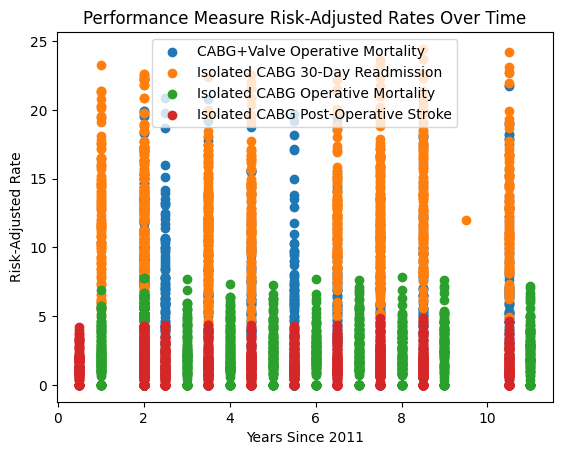

In [68]:
cabgs_df18 = pd.read_csv("cabgs.csv")
cabgs_df18_nan = cabgs_df18[cabgs_df18.isna().any(axis = 1)] #Get all rows with at least one NaN value in them


nan_row = cabgs_df18_nan.index.to_list()[0]
cabgs_df18 = cabgs_df18.drop(index = nan_row)
cabgs_df18["OSHPD ID"] = cabgs_df18["Hospital ID"].astype("string").apply(lambda x: None if (x == "" or x == " ") else float(x))

cabgs_df18["Statewide Adverse Events Rate (%)"] = cabgs_df18["Statewide Adverse Events Rate (%)"].astype("string").apply(get_rate)

cabgs_df18["County"] = cabgs_df18["County"].astype('string')
cabgs_df18['Performance Measure'] = cabgs_df18['Performance Measure'].astype("string")
cabgs_df18["Hospital ID"] = cabgs_df18["Hospital ID"].astype("int")
cabgs_df18["OSHPD ID"] = cabgs_df18["OSHPD ID"].astype("int")

cabgs_df18["YearsSince2011"] = cabgs_df18["Year"].astype("string").apply(get_year)
cabgs_df18['Risk-adjusted Rate'] = cabgs_df18['Hospital Risk-Adjusted Adverse Events Rate (%,RAAER)'].apply(get_rate)

rates_group = cabgs_df18.groupby("Performance Measure")
new_dfs = []
for _, df in rates_group:
  Q1 = df["Risk-adjusted Rate"].quantile(0.25)
  Q3 = df["Risk-adjusted Rate"].quantile(0.75)
  IQR = Q3 - Q1
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  new_dfs.append(df[(df["Risk-adjusted Rate"] >= lb) & (df["Risk-adjusted Rate"] <= ub)])

cabgs_df18 = pd.concat(new_dfs)

cabgs_df18["Performance Rating"] = cabgs_df18["Performance Rating"].astype("string").apply(lambda x: "Average" if (pd.isna(x) or x not in ["Better", "Average", "Worse"]) else x)
display(cabgs_df18)
measures_group18 = cabgs_df18.groupby("Performance Measure")

for measure, df in measures_group18:
  data_rot[measure][0] = np.concatenate([data_rot[measure][0], df["YearsSince2011"].to_numpy().astype(float)])
  data_rot[measure][1] = np.concatenate([data_rot[measure][1], df["Risk-adjusted Rate"].to_numpy().astype(float)])


data_rot = {measure: data for measure, data in data_rot.items() if len(data[0]) > 4}


for measure, xy in data_rot.items():
  length = len(xy[0])
  indices = np.random.choice(np.arange(0, length), size = 300)
  year = np.array(xy[0])
  rar = np.array(xy[1])
  plt.scatter(year, rar, label = measure)

plt.legend()
plt.title("Performance Measure Risk-Adjusted Rates Over Time")
plt.xlabel("Years Since 2011")
plt.ylabel("Risk-Adjusted Rate")
plt.show()

As we see, there is a lot of variance in the data! The values vary too much in range. In order to better process our data, it is much better to group by the hospital first, then the Performance Measure, and obtain the values this way. We can then regress on the trends based on a specific hospital, which will be much more effective since each Hospital might have its own separate trends (some might have increasing mortality rates for example, while other may have decreasing ones).

,YearsSince2011,OSHPD ID,Risk-adjusted Rate,Performance Measure,Performance Rating,Latitude,Longitude
29,6.5,106010937,0.00,CABG+Valve Operative Mortality,Average,37.82,-122.26
32,5.5,106010937,2.58,CABG+Valve Operative Mortality,Average,37.82,-122.26
36,4.5,106010937,1.95,CABG+Valve Operative Mortality,Average,37.82,-122.26
40,3.5,106010937,3.91,CABG+Valve Operative Mortality,Average,37.82,-122.26
44,2.5,106010937,9.66,CABG+Valve Operative Mortality,Average,37.82,-122.26
...,...,...,...,...,...,...,...
1333,7.5,106540734,1.12,Isolated CABG Post-Operative Stroke,Average,36.33,-119.29
1334,7.5,106560473,0.75,Isolated CABG Post-Operative Stroke,Average,34.27,-119.26
1335,7.5,106560492,2.88,Isolated CABG Post-Operative Stroke,Average,34.21,-118.89
1336,7.5,106560529,2.61,Isolated CABG Post-Operative Stroke,Average,34.22,-119.16


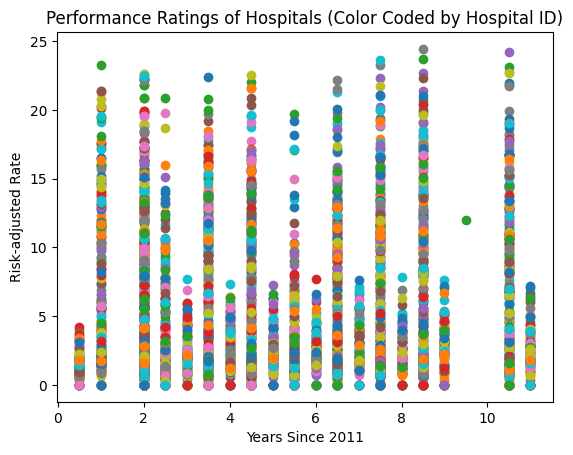

1.0

2.2844815852351985e-06

In [75]:
from sklearn.linear_model import LinearRegression
cabgs_df = pd.concat([cabgs_df11, cabgs_df18])[["YearsSince2011", "OSHPD ID", "Risk-adjusted Rate", "Performance Measure", "Performance Rating", "Latitude", "Longitude"]]


hospital_avg = cabgs_df18["Statewide Adverse Events Rate (%)"].mean()


display(cabgs_df)
data_rot_hospital = {}
hospitals_group = cabgs_df.groupby("OSHPD ID")
for ID, df in hospitals_group:
  years = df["YearsSince2011"].to_numpy().astype(float)
  data_rot_hospital[ID] = [years, df["Risk-adjusted Rate"].to_numpy().astype(float)]


r2_scores = {}
for ID, dic in data_rot_hospital.items():
  X = dic[0]
  Y = dic[1]
  reg = LinearRegression().fit(X.reshape(-1, 1), Y)
  plt.scatter(dic[0], dic[1], label = ID)
  r2c = r2_score(Y.reshape(-1, 1), reg.predict(X.reshape(-1, 1)))
  r2_scores[ID] = r2c

plt.title("Performance Ratings of Hospitals (Color Coded by Hospital ID)")
plt.xlabel("Years Since 2011")
plt.ylabel("Risk-adjusted Rate")
plt.show()

display(max(r2_scores.values()))
display(min(r2_scores.values()))

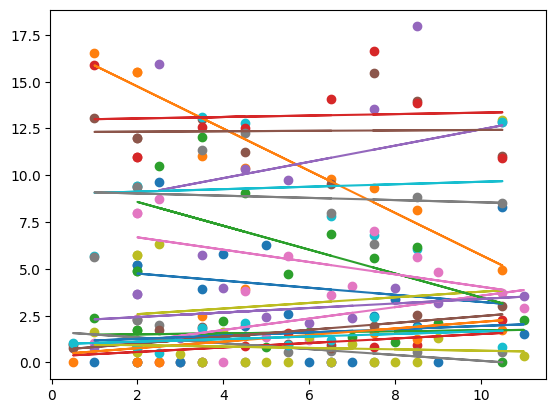

In [78]:
data_rot_by_measure = {}
for ID, temp in hospitals_group:
  data = {}
  for measure, df in temp.groupby("Performance Measure"):
    length = len(df["YearsSince2011"].to_numpy().astype(float))
    if length < 5:
      break
    data[measure] = [df["YearsSince2011"].to_numpy().astype(float), df["Risk-adjusted Rate"].to_numpy().astype(float)]
  if len(data.keys()) < 3:
    continue
  data_rot_by_measure[ID] = data


for ID, dic in list(data_rot_by_measure.items())[:5]:
  for measure, xy in dic.items():
    data = data_rot_by_measure[ID][measure]
    X = data[0]
    Y = data[1]
    reg = LinearRegression().fit(X.reshape(-1, 1), Y)
    plt.scatter(X, Y, label = measure)
    plt.plot(X, reg.predict(X.reshape(-1, 1)))
plt.show()

With this, we can only conclude that the performance ratings vary too much over time, causing significantly low R^2 values. Hence, we can only conclude that performance ratings do not vary over time in a significant way.

Why might this be? A major reason for this variance is that rating scales may change year by year. Factors such as pandemics (the COVID pandemic for example) are also another reason for this variance.

## Investigating Hospital Ratings Caused by Mortality

From the counts of each hospital above, we can see that some hospitals were very underrepresented ($14$) while many were very overrepresented ($180$).

Since the population mean is not resistant to outliers, we decided to remove all of the outliers in the dataset at the beginning before proceeding with the preliminary data analysis.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import seaborn as sns
import statsmodels.api as sm

In [ ]:
import time
import requests
#use this api call as an example in your browser #https://api.census.gov/data/2014/acs/acs5/variables.html    it gets you 2014 data
params = {    #I used the parameters below to place an API call to the American Community Survey (5 year data)
    "get": "NAME,B01003_001E,B19013_001E,B27010_001E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E",
    "for": "county:*",
    "in": "state:06",
    "key": "541d9801f32888a712369a34471ad2b037e32220"
}
all_data = dict()  #dictionary for different 
for year in range(2010, 2023): #these years were  derived from the previous fail messages
  time.sleep(1)#lets not overwhelm the api
  url = f"https://api.census.gov/data/{year}/acs/acs5"
  response = requests.get(url, params=params, timeout=10)  #get the response from the API
  if response.status_code == 200:
    data = response.json()    #creates a python object
    df = pd.DataFrame(data[1:], columns=data[0]) #we skip the headers and make our dataframe
    df.rename(columns={"B01003_001E": "Population", "B19013_001E": "Median_Income", "B27010_001E": "Health_Insurance"}, inplace=True)
    df["Year"] = year
    all_data[year] = df#actually puts dataframe in the dictionary
  else:
    print(f"MOJOR FAILURE FETCHING YEAR: {year}" )    #sometimes the columns B01001_020E were not in surveys taken 10+ years ago I use this to tell myself which years those were
#for year in range(2010, 2022):
#    display(all_data[year])
print(df.head())

In [47]:
df = pd.read_csv("CMSC320_FinalProj_Database.csv")
df = df.dropna(subset=['Hospital Ratings', 'Risk Adjuested Mortality Rate']) #we need these columns to be perfect
rating_map = {'As Expected': 1, 'Worse': 0, 'Better': 2}                     #dict for hospital ratings
county_dict = {                                                     #this is what allows me to join the two datasets since they are both county ones
    'Alameda': 'Alameda County, California',
    'Amador': 'Amador County, California',
    'Butte': 'Butte County, California',
    'Calaveras': 'Calaveras County, California',
    'Colusa': 'Colusa County, California',
    'Contra Costa': 'Contra Costa County, California',
    'Del Norte': 'Del Norte County, California',
    'El Dorado': 'El Dorado County, California',
    'Fresno': 'Fresno County, California',
    'Glenn': 'Glenn County, California',
    'Humboldt': 'Humboldt County, California',
    'Imperial': 'Imperial County, California',
    'Inyo': 'Inyo County, California',
    'Kern': 'Kern County, California',
    'Kings': 'Kings County, California',
    'Lake': 'Lake County, California',
    'Lassen': 'Lassen County, California',
    'Los Angeles': 'Los Angeles County, California',
    'Madera': 'Madera County, California',
    'Marin': 'Marin County, California',
    'Mariposa': 'Mariposa County, California',
    'Mendocino': 'Mendocino County, California',
    'Merced': 'Merced County, California',
    'Modoc': 'Modoc County, California',
    'Mono': 'Mono County, California',
    'Monterey': 'Monterey County, California',
    'Napa': 'Napa County, California',
    'Nevada': 'Nevada County, California',
    'Orange': 'Orange County, California',
    'Placer': 'Placer County, California',
    'Plumas': 'Plumas County, California',
    'Riverside': 'Riverside County, California',
    'Sacramento': 'Sacramento County, California',
    'San Benito': 'San Benito County, California',
    'San Bernardino': 'San Bernardino County, California',
    'San Diego': 'San Diego County, California',
    'San Francisco': 'San Francisco County, California',
    'San Joaquin': 'San Joaquin County, California',
    'San Luis Obispo': 'San Luis Obispo County, California',
    'San Mateo': 'San Mateo County, California',
    'Santa Barbara': 'Santa Barbara County, California',
    'Santa Clara': 'Santa Clara County, California',
    'Santa Cruz': 'Santa Cruz County, California',
    'Shasta': 'Shasta County, California',
    'Siskiyou': 'Siskiyou County, California' ,
    'Solano': 'Solano County, California',
    'Sonoma': 'Sonoma County, California',
    'Stanislaus': 'Stanislaus County, California',
    'Tehama': 'Tehama County, California',
    'Trinity': 'Trinity County, California',
    'Tulare': 'Tulare County, California',
    'Tuolumne': 'Tuolumne County, California',
    'Ventura': 'Ventura County, California',
    'Yolo': 'Yolo County, California',
    'Yuba': 'Yuba County, California'
}
X = list()   #these are used for regression later X, Y
Y = list()
full = list()   #this constructs dataframes later on
counter = 0
for index, row in df.iterrows():     #iterate over everything in the healthcare dataframe
    yer = row['YEAR']
    if (yer > 2012) and (yer < 2023):
        if row['COUNTY'] in county_dict:
            county = county_dict[row['COUNTY']]  #we need to get the county to extract the stats then we create an entry for each procedure with its county stats
            year_df = all_data[yer]
            percent_over_65 = (float(float(year_df.loc[year_df['NAME'] == county, 'B01001_020E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_021E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_022E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_023E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_024E'].iloc[0]) + float(year_df.loc[year_df['NAME'] == county, 'B01001_025E'].iloc[0])))/(float(year_df.loc[year_df['NAME'] == county, 'Population'].iloc[0]))
            insured_percent = (float(year_df.loc[year_df['NAME'] == county, 'Health_Insurance'].iloc[0]))/(float(year_df.loc[year_df['NAME'] == county, 'Population'].iloc[0]))
            x_entry = (counter, row['YEAR'], row['COUNTY'], row['HOSPITAL'], rating_map[row['Hospital Ratings']], row['Procedure/Condition'], row['Risk Adjuested Mortality Rate'], year_df.loc[year_df['NAME'] == county, 'Population'].iloc[0], year_df.loc[year_df['NAME'] == county, 'Median_Income'].iloc[0], insured_percent, percent_over_65)
            y_entry = (counter, rating_map[row['Hospital Ratings']])
            full.append(x_entry)
            x_entry2 = (counter, row['YEAR'], row['COUNTY'], row['HOSPITAL'], row['Procedure/Condition'], row['Risk Adjuested Mortality Rate'], year_df.loc[year_df['NAME'] == county, 'Population'].iloc[0], year_df.loc[year_df['NAME'] == county, 'Median_Income'].iloc[0], insured_percent, percent_over_65)
            X.append(x_entry2)
            Y.append(y_entry)
            counter += 1

In [ ]:
Machine Learning

In [27]:
import pandas as pd                  #regression this is how I investigated what sort of approach to take
import statsmodels.api as sm        #this regression wasn't very sucessful but pointed me in the right direction in which i needed to go

X_df = pd.DataFrame(X, columns=['ID', 'YEAR', 'COUNTY', 'HOSPITAL', 'PROC', 'MORTALITY', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65'])
Y_df = pd.DataFrame(Y, columns=['ID', 'Hospital Ratings'])
rating_map = {'As Expected': 1, 'Worse': 0, 'Better': 2}
Y_df['Hospital Ratings'] = Y_df['Hospital Ratings']

merged = pd.merge(X_df, Y_df, on='ID')

merged['MORTALITY'] = pd.to_numeric(merged['MORTALITY'], errors='coerce')           #make em number
merged['Hospital Ratings'] = pd.to_numeric(merged['Hospital Ratings'], errors='coerce')

merged = merged.dropna(subset=['MORTALITY', 'Hospital Ratings'])

predictors = ['MORTALITY']# , 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65'      # checking how good of a predictor mortality is
X_mortality = sm.add_constant(merged[predictors]) 
y = merged['Hospital Ratings']

model = sm.OLS(y, X_mortality).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Hospital Ratings   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1369.
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.51e-294
Time:                        21:40:08   Log-Likelihood:                -6154.3
No. Observations:               36094   AIC:                         1.231e+04
Df Residuals:                   36092   BIC:                         1.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0387      0.002    575.375      0.0

Clearly, The regression above did not provide massive insight into the variance in our dataset. This is to be expected because there are more
factors that determine hospital rating than just mortality. What is important is that there is a statistically significant relationship between the 
mortality rate and the hospital rating because the p value is less than 0.05

In [28]:
import pandas as pd
import statsmodels.api as sm

# Create dataframes
X_df = pd.DataFrame(X, columns=[
    'ID', 'YEAR', 'COUNTY', 'HOSPITAL', 'PROC',
    'MORTALITY', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65'
])
Y_df = pd.DataFrame(Y, columns=['ID', 'Hospital Ratings'])

rating_map = {'As Expected': 1, 'Worse': 0, 'Better': 2} #map
Y_df['Hospital Ratings'] = Y_df['Hospital Ratings']

merged = pd.merge(X_df, Y_df, on='ID')   # kinda shouldve maybe done this before but i can do it herre so whatever

# make the columns numbers
for col in ['MORTALITY', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65', 'Hospital Ratings']:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

# Drop bad rows
predictors = ['MORTALITY', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65']
merged = merged.dropna(subset=predictors + ['Hospital Ratings'])

X_multi = sm.add_constant(merged[predictors])  
y = merged['Hospital Ratings']

# Run regression
model = sm.OLS(y, X_multi).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Hospital Ratings   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     297.9
Date:                Thu, 08 May 2025   Prob (F-statistic):          1.57e-313
Time:                        21:42:09   Log-Likelihood:                -6096.3
No. Observations:               36094   AIC:                         1.220e+04
Df Residuals:                   36088   BIC:                         1.226e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9472      0.090     10.512

Above I wanted to get a better understanding of how much better to make our model if we integraed more variables like median income in a given county that a hospital is in, the percentage of insured people in the county, and the percentage of people over 65 in the county, and the population of the county. The model helped me understand variables that were not contributing large mounts of information to my experiment.

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
procedure_count = dict()   #I counted the number of procedures done in a given year across all hospitals
procedure_total_mortality = dict()      #i summed up their total mortality for that year for that procedure
for thing in full:
    procedure_total_mortality[(thing[4], thing[1])] = procedure_count.get(thing[4], 0) + float(thing[6])
    procedure_count[(thing[4], thing[1])] = procedure_count.get(thing[4], 0) + 1
procedure_avg_mort = dict()
for thing in procedure_count.keys():
    procedure_avg_mort[thing] = procedure_total_mortality[thing] / procedure_count[thing]

full_df = pd.DataFrame(full, columns=[
    'ID', 'YEAR', 'COUNTY', 'HOSPITAL', 'Hospital Ratings', 'PROC', 'MORTALITY',   #removed hospital
    'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65'
])
grouped_by_hospital = full_df.groupby(['HOSPITAL', 'YEAR'])   #grouped by year and hospital to be able to predict their rating for a hospital for that year
new_full = list()
for (hospital_name, year), group_df in grouped_by_hospital:
    squared_errors = 0
    itm_1 = None
    itm_2 = None
    itm_3  = None
    itm_4  = None
    itm_5  = None
    itm_6  = None
    itm_7  = None
    itm_8 = None
    for _, row in group_df.iterrows():
        itm_1 = year
        itm_2 = row['COUNTY']
        itm_3 = hospital_name
        itm_4  = row['POP']
        itm_5  = row['MEDIAN_INCOME']
        itm_6  = row['INSURED']
        itm_7  = row['OVER_65']
        itm_8 = row['Hospital Ratings']      #true rating
        proc = row['PROC']
        actual = float(row['MORTALITY'])
        expected = procedure_avg_mort.get((proc, itm_1), 0)  # expected rating which is just the average for that year 0 if unknown
        error = (actual - expected) #  and have this be a new variable because  if they deviate we know what to predict
        squared_errors += error
    new_full.append((itm_1, itm_2, itm_3, itm_4, itm_5, itm_6, itm_7, squared_errors, itm_8))


In [16]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


The code below for the machine learning model is very similar to the homework. I used the same seed as the homework and even the same spit ratio into the training and testing dataset. testing was done on hospital rating which my classifier tried to predict. Other variables were used as input (specifically the newly made ones in the cell above) Since we are tackling a classification problem I chose to use MLP model which has multiple levels of neurons. Our original dataset of procedures which we then combined into (hostipal, year) has plenty of datapoints so we can use this techinique. Additionally, I created tensors in order to be able to use the cross entropy loss function to train my model. I shuffle the training data for better randomization so that my model generalizes, simultaneously I am keeping my testing data unshuffled to preserve its ordering so i can then compare the results.

In [33]:
new_full_df = pd.DataFrame(new_full, columns=['YEAR', 'COUNTY', 'HOSPITAL', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65', 'MORTALITY_MSE', 'Hospital Ratings'])

new_full_df.dropna()
#print(new_full_df)
new_full_df['Hospital Ratings'] = new_full_df['Hospital Ratings'].replace(rating_map)

X = new_full_df.drop(columns=['COUNTY', 'HOSPITAL', 'Hospital Ratings'])  # I do not want to contaminate the training data with the results
#columns_to_exclude = ['YEAR', 'COUNTY', 'HOSPITAL', 'POP', 'MEDIAN_INCOME', 'INSURED', 'OVER_65', 'MORTALITY_MSE']
y = new_full_df['Hospital Ratings'] #just the results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
y_train_tensor = y_train_tensor.squeeze()
y_test_tensor = y_test_tensor.squeeze()
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

feat_dim = X_train.shape[1]

class MLPModel(nn.Module):
    def __init__(self, feat_dim):
        super(MLPModel, self).__init__()
        self.layer1 = nn.Linear(feat_dim, 24)
        self.layer2 = nn.Linear(24, 12)
        self.output = nn.Linear(12, 3)# 3 outputs 

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)  #F.relu()
        x = self.output(x)  
        return x
model = MLPModel(feat_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
losses = list()
epochs = 100
for epoch in range(epochs):
    running_loss = 0.0
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data) 
        loss = criterion(outputs, targets)  
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss:.4f}")

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    outputs = model(X_test_tensor) 
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = correct / total
print(f"Classification Accuracy: {accuracy:.4f}")


model.eval()
with torch.no_grad():
    # get preiction
    outputs = model(X_test_tensor)  # my dimensions are good
    _, predicted = torch.max(outputs, dim=1)  # discard the first thing

    y_true = y_test_tensor.numpy()  #make arrays
    y_pred = predicted.numpy()
    print("These values are what the model was supposed to predict")
    print(y_true)
    print("These are the values the model predicted")
    print(y_pred)
    
    accuracy = accuracy_score(y_true, y_pred)                          #get the stuff we are actually interested in

    print(f"Accuracy:  {accuracy:.4f}")


Epoch 1/100, Loss: 56.2244
Epoch 2/100, Loss: 29.9830
Epoch 3/100, Loss: 24.4887
Epoch 4/100, Loss: 24.3064
Epoch 5/100, Loss: 24.2285
Epoch 6/100, Loss: 24.2323
Epoch 7/100, Loss: 24.2031
Epoch 8/100, Loss: 24.2146
Epoch 9/100, Loss: 24.2130
Epoch 10/100, Loss: 24.0852
Epoch 11/100, Loss: 24.0837
Epoch 12/100, Loss: 24.0984
Epoch 13/100, Loss: 24.1379
Epoch 14/100, Loss: 24.0268
Epoch 15/100, Loss: 24.0352
Epoch 16/100, Loss: 24.1116
Epoch 17/100, Loss: 24.0426
Epoch 18/100, Loss: 24.0546
Epoch 19/100, Loss: 24.1130
Epoch 20/100, Loss: 24.0570
Epoch 21/100, Loss: 24.0724
Epoch 22/100, Loss: 24.0545
Epoch 23/100, Loss: 24.0561
Epoch 24/100, Loss: 24.0387
Epoch 25/100, Loss: 24.0220
Epoch 26/100, Loss: 24.0654
Epoch 27/100, Loss: 24.0361
Epoch 28/100, Loss: 24.0496
Epoch 29/100, Loss: 24.0700
Epoch 30/100, Loss: 24.1362
Epoch 31/100, Loss: 24.1177
Epoch 32/100, Loss: 24.0871
Epoch 33/100, Loss: 24.0355
Epoch 34/100, Loss: 24.0907
Epoch 35/100, Loss: 24.0243
Epoch 36/100, Loss: 24.0336
E

The visual above demonstrates some key witnesses in my model. Unfortunanetly, it predicts one every time. If we analyzed the recall for each hospital rating such as 0 or 2 we would see that the model has 0 recall. Unfortunanetly, this is an unfortunate reality of the model.

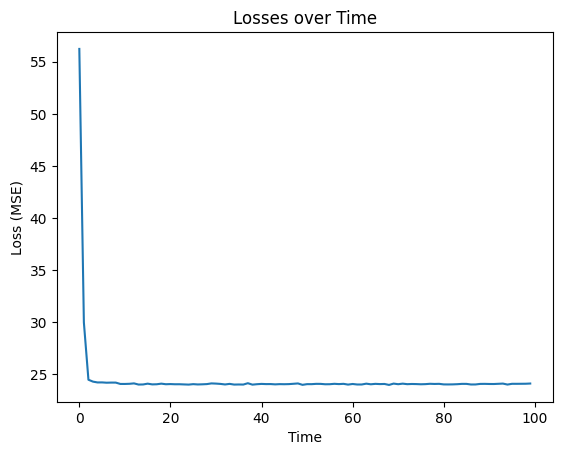

In [34]:
plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

**Conclusion**

Above we can clearly see the Error converging. This is good but it's only happening because the model is learning to constantly guess the number one. This lack of generalization is a key flaw of the model unfortunanetly. However as demonstrated by the previously poor regression results, I believe that the flaws were less atributable to our specific model and more a consequence of the poor data which didn't demonstrate a high R^2 value with the variables that we were investigating. 

# Question 3: 
## Trends in Performance Ratings over Time

In [ ]:
new_measures = ["30-Day Readmission", "Post-Operative Stroke", "CABG Operative Mortality", "CABG+Valve Operative Mortality"]
def get_year(s):
  index = s.find("-")
  if index == -1:
    if s.isnumeric():
      return int(s) - 2011
    return 0
  return (int(s[:index]) + int(s[index + 1:]))/2 - 2011

def get_rate(s):
  if s == ' ' or s == '.':
    return 0.0
  index = s.find(",")
  if index == -1:
    return float(s)
  return float(s[index + 1:])

def get_measure(s):
  s = s.strip()
  if(s == "CABG Operative Mortality" or s == "Operative Mortality"):
    return "Isolated CABG Operative Mortality"
  elif(s == "CABG + Valve Operative Mortality"):
    return "CABG+Valve Operative Mortality"
  elif(s == "30-day Readmission" or s == "30-Day Readmission" or s == "CABG 30-Day Readmission"):
    return "Isolated CABG 30-Day Readmission"
  return "Isolated CABG Post-Operative Stroke"



cabgs_df11 = pd.read_csv("/content/drive/MyDrive/cabgs2011.csv", encoding='cp1252')


cabgs_df11 = cabgs_df11.dropna(subset = ["Year", "Risk-adjusted Rate", "OSHPD ID"])
cabgs_df11["OSHPD ID"] = cabgs_df11["OSHPD ID"].astype("string").apply(lambda x: None if (x == "" or x == " ") else int(x))
cabgs_df11 = cabgs_df11.dropna(subset = ["OSHPD ID"])

cabgs_df11["Performance Rating"] = cabgs_df11["Performance Rating"].astype("string").apply(lambda x: "Average" if (pd.isna(x) or x not in ["Better", "Average", "Worse"]) else x)
cabgs_df11["Performance Measure"] = cabgs_df11["Performance Measure"].astype("string").apply(get_measure)
cabgs_df11["County"] = cabgs_df11["County"].astype("string")
cabgs_df11["OSHPD ID"] = cabgs_df11["OSHPD ID"].astype("int")

cabgs_df11["County"] = cabgs_df11["County"].astype('string')
cabgs_df11["YearsSince2011"] = cabgs_df11["Year"].astype("string").apply(get_year)
cabgs_df11["Risk-adjusted Rate"] = cabgs_df11["Risk-adjusted Rate"].astype("string").apply(get_rate)

cabgs_df11["Performance Rating"] = cabgs_df11["Performance Rating"].astype("string")
rates_group_11 = cabgs_df11.groupby("Performance Measure")
new_dfs_11 = []
for _, df in rates_group_11:
  Q1 = df["Risk-adjusted Rate"].quantile(0.25)
  Q3 = df["Risk-adjusted Rate"].quantile(0.75)
  IQR = Q3 - Q1
  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  new_dfs_11.append(df[(df["Risk-adjusted Rate"] >= lb) & (df["Risk-adjusted Rate"] <= ub)])

cabgs_df11 = pd.concat(new_dfs_11)
display(cabgs_df11.shape)
data_rot = {}

measures_group11 = cabgs_df11.groupby("Performance Measure")
for measure, df in measures_group11:
  data_rot[measure] = [df["YearsSince2011"].to_numpy().astype(float), df["Risk-adjusted Rate"].to_numpy().astype(float)]